# Úkol 2: Test hypotézy
### Príprava dát
Načítanie potrebných knižníc, datasetov (`accidents` a `vehicles`), vytvorenie pomocných mapingov a konštánt

In [22]:
import itertools

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats

# Nastavenie štýlu pre grafy
sns.set_theme(style="whitegrid", palette="deep")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 12

print("Knižnice úspešne načítané a nastavené.")

Knižnice úspešne načítané a nastavené.


In [ ]:
def load_data():
    """Načíta dáta zo súborov accidents.pkl.gz a vehicles.pkl.gz."""
    try:
        df_accidents = pd.read_pickle("accidents.pkl.gz")
        df_vehicles = pd.read_pickle("vehicles.pkl.gz")
        print("Dáta úspešne načítané.")
        return df_accidents, df_vehicles
    except FileNotFoundError:
        print("Chyba: Súbory so zdrojovými dátami sa nenašli.")
        return None, None

df_accidents, df_vehicles = load_data()

# Mapovanie kódů typov ciest na názvy (podľa číselníka Polície ČR)
ROAD_MAP = {
    0: 'Diaľnica',
    1: 'Cesta 1. triedy',
    3: 'Cesta 3. triedy'
}

# Mapovanie kódů značiek na názvy (podľa číselníka Polície ČR)
BRAND_MAP = {
    1 : "ALFA-ROMEO",
    2 : "AUDI", 
    3 : "AVIA",
    4 : "BMW",
    5 : "CHEVROLET",
    6 : "CHRYSLER",
    7 : "CITROEN",
    8 : "DACIA",
    9 : "DAEWOO",
    10 : "DAF",
    11 : "DODGE",
    12 : "FIAT",
    13 : "FORD",
    14 : "GAZ, VOLHA",
    15 : "FERRARI",
    16 : "HONDA",
    17 : "HYUNDAI",
    18 : "IFA",
    19 : "IVECO",
    20 : "JAGUAR",
    21 : "JEEP",
    22 : "LANCIA",
    23 : "LAND ROVER",
    24 : "LIAZ",
    25 : "MAZDA",
    26 : "MERCEDES",
    27 : "MITSUBISHI",
    28 : "MOSKVIČ",
    29 : "NISSAN",
    30 : "OLTCIT",
    31 : "OPEL",
    32 : "PEUGEOT",
    33 : "PORSCHE",
    34 : "PRAGA",
    35 : "RENAULT",
    36 : "ROVER",
    37 : "SAAB",
    38 : "SEAT",
    39 : "ŠKODA",
    40 : "SCANIA",
    41 : "SUBARU",
    42 : "SUZUKI",
    43 : "TATRA",
    44 : "TOYOTA",
    45 : "TRABANT",
    46 : "VAZ",
    47 : "VOLKSWAGEN",
    48 : "VOLVO",
    49 : "WARTBURG",
    50 : "ZASTAVA",
    51 : "AGM",
    52 : "ARO",
    53 : "AUSTIN",
    54 : "BARKAS",
    55 : "DAIHATSU",
    56 : "DATSUN",
    57 : "DESTACAR",
    58 : "ISUZU",
    59 : "KAROSA",
    60 : "KIA",
    61 : "LUBLIN",
    62 : "MAN",
    63 : "MASERATI",
    64 : "MULTICAR",
    65 : "PONTIAC",
    66 : "ROSS",
    67 : "SIMCA", 
    68 : "SSANGYONG",
    69 : "TALBOT",
    70 : "TAZ",
    71 : "ZAZ"
}

alpha = 0.05 # 95% hladina významnosti

Dáta úspešne načítané.


# Overenie Hypotézy 1

**Zadanie**
Na silnicích první třídy se při nehodách umíralo se stejnou pravděpodobností jako na silnicích třetí třídy.

Pre overenie hypotézy rozdelíme analýzu na dve časti:
1. **Úmrtnosť:** Porovnanie ciest 1. triedy a 3. triedy.
2. **Následky na zdraví:** Porovnanie ciest 1. triedy a diaľnic.



### Časť 1: Úmrtnosť na cestách 1. triedy vs. 3. triedy

V tejto časti testujeme nulovú hypotézu:
> **$H_0$**: Pravdepodobnosť úmrtia pri nehode na ceste 1. triedy je rovnaká ako na ceste 3. triedy.

**Metodika:**
* Filtrujeme dáta pre cesty 1. triedy (`p36 = 1`) a 3. triedy (`p36 = 3`).
* Vytvoríme príznak smrteľnej nehody (`fatal_accident`) na základe počtu usmrtených osôb (`p13a > 0`).
* Použijeme **$\chi^2$ test nezávislosti** (Chi-square contingency test) na porovnanie početností.

In [24]:
# 1. Príprava dát pre úmrtnosť
df_h1 = df_accidents.loc[df_accidents['p36'].isin([1, 3]), ['p36', 'p13a']].copy()
df_h1['road_type'] = df_h1['p36'].map(ROAD_MAP)
df_h1['fatal'] = df_h1['p13a'] > 0  # True ak niekto zomrel

# Kontingenčná tabuľka pre úmrtnosť
ct_fatal = pd.crosstab(df_h1['road_type'], df_h1['fatal'])

# Chi2 test pre úmrtnosť
chi2_stat, p_val_fatal, dof, expected_fatal = stats.chi2_contingency(ct_fatal)

print("=== Výsledky Hypotézy 1 (Úmrtnosť) ===")
print(f"P-hodnota: {p_val_fatal:.4e}")
if p_val_fatal < alpha:
    print("Záver: Zamietame nulovú hypotézu. Pravdepodobnosť úmrtia sa štatisticky významne líši.")
else:
    print("Záver: Nezamietame nulovú hypotézu. Rozdiel v úmrtnosti nie je významný.")

=== Výsledky Hypotézy 1 (Úmrtnosť) ===
P-hodnota: 9.0488e-13
Záver: Zamietame nulovú hypotézu. Pravdepodobnosť úmrtia sa štatisticky významne líši.


### Časť 2: Následky na zdraví (Diaľnice vs. 1. trieda)

V druhej časti zisťujeme, či nehody na cestách 1. triedy vedú k následkom na zdraví častejšie alebo menej často než na diaľniciach.

> **$H_0$**: Podiel nehôd s následkami na zdraví je na cestách 1. triedy a diaľniciach rovnaký.

**Metodika:**
* Filtrujeme dáta pre diaľnice (`p36 = 0`) a cesty 1. triedy (`p36 = 1`).
* Definujeme nehodu s následkami na zdraví pomocou stĺpca `p9` (všetky hodnoty okrem 2 - "nehoda len s hmotnou škodou").
* Pomocou **očakávaných početností (expected frequencies)** z $\chi^2$ testu určíme smer závislosti (častejšie/menej často).

In [25]:
# Príprava dát (1. trieda vs Diaľnica, p36=1 vs p36=0)
df_health = df_accidents.loc[df_accidents['p36'].isin([0, 1]), ['p36', 'p9']].copy()
df_health['road_type'] = df_health['p36'].map(ROAD_MAP)

# Následok na zdraví je čokoľvek okrem p9==2 (nehoda len s hmotnou škodou)
df_health['health_consequence'] = df_health['p9'] != 2

ct_health = pd.crosstab(df_health['road_type'], df_health['health_consequence'])
chi2_h, p_val_h, dof_h, exp_h = stats.chi2_contingency(ct_health)

# Analýza pomocou očakávaných hodnôt
# Nájdeme indexy v tabuľke
idx_1st = "Cesta 1. triedy"
col_consequence = True

observed_1st = ct_health.loc[idx_1st, col_consequence]
# Expected pole má rovnaké poradie ako crosstab, musíme nájsť súradnice
row_idx = list(ct_health.index).index(idx_1st)
col_idx = list(ct_health.columns).index(col_consequence)
expected_1st = exp_h[row_idx, col_idx]

print("\n=== Analýza následkov na zdraví (1. trieda vs Diaľnica) ===")
print(f"Pozorované nehody s následkami (1. trieda): {observed_1st}")
print(f"Očakávané nehody s následkami (1. trieda, ak by nezáležalo na ceste): {expected_1st:.2f}")

print(f"Záver: Nehody na cestách 1. triedy viedli k následkom na zdraví {"ČASTEJŠIE" if observed_1st > expected_1st else "MENEJ ČASTO"
} než na diaľniciach.")


=== Analýza následkov na zdraví (1. trieda vs Diaľnica) ===
Pozorované nehody s následkami (1. trieda): 10894
Očakávané nehody s následkami (1. trieda, ak by nezáležalo na ceste): 9375.45
Záver: Nehody na cestách 1. triedy viedli k následkom na zdraví ČASTEJŠIE než na diaľniciach.


# Hypotéza 2: Porovnanie škody medzi značkami vozidiel

**Zadanie:**
Škoda při nehodách značky X je nižší, než při nehodách značky Y a tato odchylka je statisticky významná.


### Načítanie a príprava dát
Použijeme dataset `vehicles.pkl.gz`. Zaujímajú nás stĺpce `p53` (škoda na vozidle v stovkách Kč) a `p45a` (výrobná značka).

In [26]:

# Príprava dát
df_cars = df_vehicles[['p45a', 'p53']].copy()
# Odstránenie NaN a neznámych značiek (0)
df_cars = df_cars[(df_cars['p45a'].notna()) & (df_cars['p53'].notna()) & (df_cars['p45a'] != 0)]
# Konverzia na numerický typ (p53 je v stovkách Kč)
df_cars['p53'] = pd.to_numeric(df_cars['p53'], errors='coerce')
df_cars.dropna(inplace=True)

# Test normality (Shapiro-Wilk)
# Pre veľké dáta použijeme vzorku, inak test beží dlho a je príliš citlivý
sample_damage = df_cars['p53'].sample(n=5000, random_state=42)
stat_shapiro, p_shapiro = stats.shapiro(sample_damage)

print("=== Test normality dát (Shapiro-Wilk) ===")
print(f"P-hodnota: {p_shapiro:.4e}")
is_normal = p_shapiro > alpha

if is_normal:
    print("Dáta majú normálne rozdelenie -> Použijeme T-test.")
else:
    print("Dáta NEMAJÚ normálne rozdelenie -> Použijeme Mann-Whitney U test.")

=== Test normality dát (Shapiro-Wilk) ===
P-hodnota: 2.1783e-80
Dáta NEMAJÚ normálne rozdelenie -> Použijeme Mann-Whitney U test.


### Identifikácia párov pre hypotézu

In [ ]:
def find_brand_differences(df, brands_map, significance_level=0.05):
    """Nájde dvojice značiek so štatisticky významným a nevýznamným rozdielom v škode."""
    # Vyberieme len top značky pre relevantnú analýzu
    top_brands = df['p45a'].value_counts().index.tolist()
    
    sig_pair = None
    insig_pair = None
    
    # Prechádzame unikátne dvojice
    for b1, b2 in itertools.combinations(top_brands, 2):
        # Ak už máme oba prípady, končíme
        if sig_pair and insig_pair:
            break
            
        damage_1 = df[df['p45a'] == b1]['p53']
        damage_2 = df[df['p45a'] == b2]['p53']
        
        # Mann-Whitney U test (alternative='two-sided')
        _, p_val = stats.mannwhitneyu(damage_1, damage_2)
        
        name1, name2 = brands_map.get(b1, str(b1)), brands_map.get(b2, str(b2))
        mean1, mean2 = damage_1.mean(), damage_2.mean()
        
        result = {
            "brands": (name1, name2),
            "codes": (b1, b2),
            "p_value": p_val,
            "means": (mean1, mean2)
        }
        
        if p_val < significance_level and sig_pair is None:
            sig_pair = result
        elif p_val > significance_level and insig_pair is None:
            insig_pair = result
            
    return sig_pair, insig_pair

sig_result, insig_result = find_brand_differences(df_cars, BRAND_MAP)

# Výpis výsledkov
print("=== Výsledky porovnania značiek ===")
if sig_result:
    b1, b2 = sig_result['brands']
    m1, m2 = sig_result['means']
    direction = "nižšia" if m1 < m2 else "vyššia"
    print(f"1. Štatisticky VÝZNAMNÝ rozdiel: {b1} vs {b2}")
    print(f"   P-hodnota: {sig_result['p_value']:.4e}")
    print(f"   Záver: Škoda pri značke {b1} je {direction} než pri {b2}.")

if insig_result:
    b1, b2 = insig_result['brands']
    print(f"\n2. Štatisticky NEVÝZNAMNÝ rozdiel (nedá sa určiť): {b1} vs {b2}")
    print(f"   P-hodnota: {insig_result['p_value']:.4f}")
    print("   Záver: Rozdiel v škodách nie je preukázateľný.")

=== Výsledky porovnania značiek ===
1. Štatisticky VÝZNAMNÝ rozdiel: ŠKODA vs VOLKSWAGEN
   P-hodnota: 2.6706e-08
   Záver: Škoda pri značke ŠKODA je vyššia než pri VOLKSWAGEN.

2. Štatisticky NEVÝZNAMNÝ rozdiel (nedá sa určiť): ŠKODA vs MAZDA
   P-hodnota: 0.0685
   Záver: Rozdiel v škodách nie je preukázateľný.


### Vizualizácia

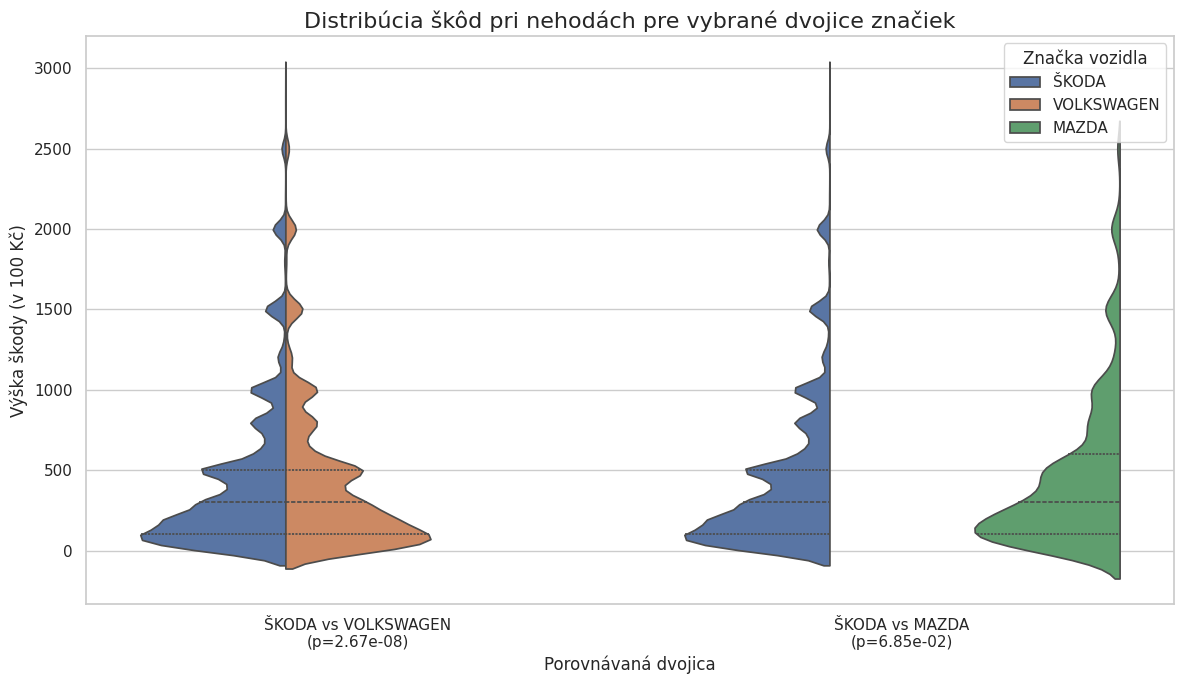

In [ ]:
# Príprava dát pre vizualizáciu len pre nájdené páry
plot_data = pd.DataFrame()

pairs_to_plot = []
if sig_result: 
    pairs_to_plot.append(sig_result)
if insig_result: 
    pairs_to_plot.append(insig_result)

for res in pairs_to_plot:
    b1_code, b2_code = res['codes']
    # Filtrujeme dáta
    mask = df_cars['p45a'].isin([b1_code, b2_code])
    subset = df_cars[mask].copy()
    
    # Pridáme stĺpec s názvom skupiny pre legendu
    pair_name = f"{res['brands'][0]} vs {res['brands'][1]}\n(p={res['p_value']:.2e})"
    subset['group'] = pair_name
    subset['Brand Name'] = subset['p45a'].map(BRAND_MAP)
    
    plot_data = pd.concat([plot_data, subset])

# Vykreslenie
plt.figure(figsize=(12, 7))

max_value = 3000
# Použijeme Violin plot pre zobrazenie hustoty + Box plot pre kvartily
plot_data_filtered = plot_data[plot_data['p53'] < max_value] 

sns.violinplot(x="group", y="p53", hue="Brand Name", data=plot_data_filtered, split=True, inner="quart")

plt.title("Distribúcia škôd pri nehodách pre vybrané dvojice značiek", fontsize=16)
plt.ylabel("Výška škody (v 100 Kč)", fontsize=12)
plt.xlabel("Porovnávaná dvojica", fontsize=12)
plt.legend(title="Značka vozidla", loc='upper right')

plt.tight_layout()
plt.show()